In [7]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd

csfont = {"fontname": "Calibri"}
hfont = {"fontname": "Calibri"}

# color:
# F4F7BE and 823038
# 3581B8 and FCB07E
# FCB07E and DEE2D6
# 1B998B and ED217C and 2D3047 alpha/beta/ext


In [8]:
def decidegreaterzero(row):
    if row["test"] == False:
        val = np.nan
    if row["test"] == True:
        val = np.log10(row["Itosig_alpha"])
    return val

def decidegreaterzero2(row):
    if row["test"] == False:
        val = np.nan
    if row["test"] == True:
        val = np.log10(row["Itosig_beta"])
    return val

In [9]:
a = pd.read_csv("output_alpha.csv")
a["Inv-dspac_alpha"] = (1/a["Reflins_dspac_alpha"])
a["test"] = ((a["Itosig_alpha"]>0.05))
a["logitosig_a"] = a.apply(decidegreaterzero, axis = 1 )

b = pd.read_csv("output_beta.csv")
b["Inv-dspac_beta"] = (1/b["Reflins_dspac_beta"])
b["test"] = ((b["Itosig_beta"]>0.05))
b["logitosig_b"] = b.apply(decidegreaterzero2, axis = 1 )

FileNotFoundError: [Errno 2] File output_alpha.csv does not exist: 'output_alpha.csv'

In [6]:
a

NameError: name 'a' is not defined

In [146]:
b

,Reflins_dspac_beta,Itosig_beta,Intensities_beta,Sigmas_beta,Inv-dspac_beta,test,logitosig_b
0,0.061434,-5.670000,-52.55,0.47,16.277656,False,NaN
1,0.061434,-4.513258,-45.36,0.55,16.277656,False,NaN
2,0.061434,-4.240506,-42.55,0.60,16.277656,False,NaN
3,0.061434,-4.230337,-41.93,0.63,16.277656,False,NaN
4,0.061752,-3.979487,-41.70,0.67,16.193817,False,NaN
...,...,...,...,...,...,...,...
128728,1.733034,85.675913,8776.12,178.97,0.577023,True,1.932859
128729,1.733877,87.013132,9706.67,179.66,0.576742,True,1.939585
128730,1.734841,89.020908,9879.65,183.63,0.576422,True,1.949492
128731,1.736987,93.209896,9886.33,191.72,0.575709,True,1.969462


In [2]:
# plotting reflexions vs dspacing, lineplot

reflins_alpha = a["Reflins_dspac_alpha"]
reflins_beta = b["Reflins_dspac_beta"]
nr_a = range(0,len(reflins_alpha))
nr_b = range(0,len(reflins_beta))

plt.grid(alpha = 0.2)

plt.plot(reflins_alpha, nr_a, label="Alpha", color = "#1B998B")
plt.plot(reflins_beta, nr_b, label="Beta", color = "#ED217C")

plt.xlabel("$\frac{1}{d}$/$\AA^-1$", hfont)
plt.ylabel("Number of Reflexions", hfont)
plt.title("Number of Reflexions VS Inverse d-Spacing", hfont)

plt.legend()
plt.tight_layout()
plt.savefig("NrvsDspac.svg", format = "svg")

NameError: name 'a' is not defined

In [153]:
# plotting itosigs as a function of log(itosig) 

aI = a["logitosig_a"]
bI = b["logitosig_b"]

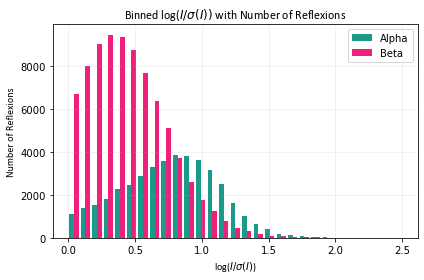

In [178]:
bins = np.linspace(0, 2.5, 30)

colors = ["#1B998B","#ED217C"]
labels = ["Alpha", "Beta"]

plt.grid(alpha = 0.2)

plt.title("Binned log($I/\sigma(I))$ with Number of Reflexions", hfont)
plt.xlabel(r"log($I/\sigma(I)$)", hfont)
plt.ylabel("Number of Reflexions", hfont)
plt.hist([aI,bI], bins, label = labels, color = colors)


plt.tight_layout()
plt.legend()
plt.savefig("BinnedItosig.svg", format = "svg")

In [205]:
# loading A Factors

A_Cyc_a = pd.read_csv(r"C:\Users\LocalAdmin\Desktop\Alpha\SC_ABFactors\A_Cyc_ALPHA.txt",delim_whitespace=True)
A_Cyc_b = pd.read_csv(r"C:\Users\LocalAdmin\Desktop\Alpha\SC_ABFactors\A_Cyc_BETA.txt",delim_whitespace=True)
A_Cyc_b_ext = pd.read_csv(r"C:\Users\LocalAdmin\Desktop\Alpha\SC_ABFactors\A_Cyc_BETA_ext.txt",delim_whitespace=True)
A_Daid_a = pd.read_csv(r"C:\Users\LocalAdmin\Desktop\Alpha\SC_ABFactors\A_Daid_ALPHA.txt",delim_whitespace=True)
A_Daid_b = pd.read_csv(r"C:\Users\LocalAdmin\Desktop\Alpha\SC_ABFactors\A_Daid_BETA.txt",delim_whitespace=True)

In [204]:
A_Cyc_a

,FRAME,A-FACTOR,RUN
0,2.0,0.003,1.0
1,3.0,0.005,1.0
2,4.0,0.008,1.0
3,5.0,0.010,1.0
4,6.0,0.013,1.0
...,...,...,...
1455,1457.0,-1.079,24.0
1456,1458.0,-1.079,24.0
1457,1459.0,-1.079,24.0
1458,1460.0,-1.079,24.0


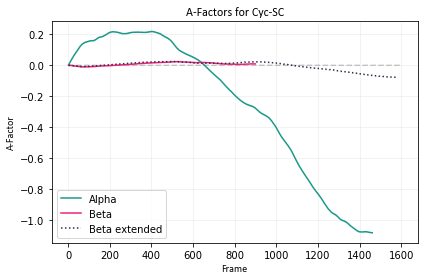

In [235]:
# Plotting A Factors Cyc

def f0(x):
    return x*0

plt.grid(alpha = 0.2)

x0 = np.arange(0, 1600, 1)

plt.plot(x0, f0(x0), color = "black", linestyle = "--", alpha = 0.2)
plt.plot(A_Cyc_a["FRAME"],A_Cyc_a["A-FACTOR"], label = "Alpha", color = "#1B998B")
plt.plot(A_Cyc_b["FRAME"],A_Cyc_b["A-FACTOR"], label = "Beta", color = "#ED217C")
plt.plot(A_Cyc_b_ext["FRAME"],A_Cyc_b_ext["A-FACTOR"], label= "Beta extended", color = "#2D3047", linestyle="dotted")

plt.title("A-Factors for Cyc-SC", hfont)
plt.xlabel("Frame", hfont)
plt.ylabel("A-Factor", hfont)
plt.legend()
plt.tight_layout()

plt.savefig("A-Facs_Cyc.svg", format = "svg")


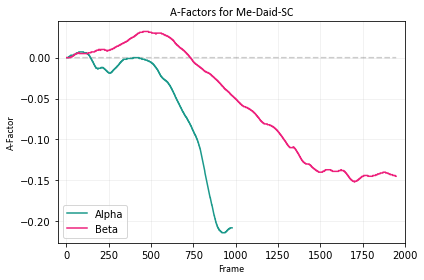

In [246]:
# Plotting A Factors Daid

def f0(x):
    return x*0

plt.grid(alpha = 0.2)

x0 = np.arange(0, 1950, 1)
plt.xlim(-50, 2000)

plt.plot(x0, f0(x0), color = "black", linestyle = "--", alpha = 0.2)
plt.plot(A_Daid_a["FRAME"],A_Daid_a["A-FACTOR"], label = "Alpha", color = "#1B998B")
plt.plot(A_Daid_b["FRAME"],A_Daid_b["A-FACTOR"], label = "Beta", color = "#ED217C")

plt.title("A-Factors for Me-Daid-SC", hfont)
plt.xlabel("Frame", hfont)
plt.ylabel("A-Factor", hfont)
plt.legend()
plt.tight_layout()

plt.savefig("A-Facs_Daid.svg", format = "svg")

In [237]:
# loading B-Factors

B_Cyc_a = pd.read_csv(r"C:\Users\LocalAdmin\Desktop\Alpha\SC_ABFactors\B_Cyc_ALPHA.txt",delim_whitespace=True)
B_Cyc_b = pd.read_csv(r"C:\Users\LocalAdmin\Desktop\Alpha\SC_ABFactors\B_Cyc_BETA.txt",delim_whitespace=True)
B_Cyc_b_ext = pd.read_csv(r"C:\Users\LocalAdmin\Desktop\Alpha\SC_ABFactors\B_Cyc_BETA_ext.txt",delim_whitespace=True)
B_Daid_a = pd.read_csv(r"C:\Users\LocalAdmin\Desktop\Alpha\SC_ABFactors\B_Daid_ALPHA.txt",delim_whitespace=True)
B_Daid_b = pd.read_csv(r"C:\Users\LocalAdmin\Desktop\Alpha\SC_ABFactors\B_Daid_BETA.txt",delim_whitespace=True)

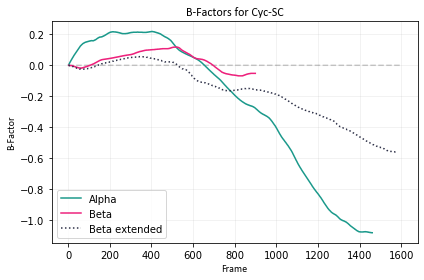

In [245]:
# Plotting B Factors Cyc

def f0(x):
    return x*0

plt.grid(alpha = 0.2)

x0 = np.arange(0, 1600, 1)

plt.plot(x0, f0(x0), color = "black", linestyle = "--", alpha = 0.2)
plt.plot(B_Cyc_a["FRAME"],B_Cyc_a["A-FACTOR"], label = "Alpha", color = "#1B998B")
plt.plot(B_Cyc_b["FRAME"],B_Cyc_b["A-FACTOR"], label = "Beta", color = "#ED217C")
plt.plot(B_Cyc_b_ext["FRAME"],B_Cyc_b_ext["A-FACTOR"], label= "Beta extended", color = "#2D3047", linestyle="dotted")

plt.title("B-Factors for Cyc-SC", hfont)
plt.xlabel("Frame", hfont)
plt.ylabel("B-Factor", hfont)
plt.legend()
plt.tight_layout()

plt.savefig("B-Facs_Cyc.svg", format = "svg")

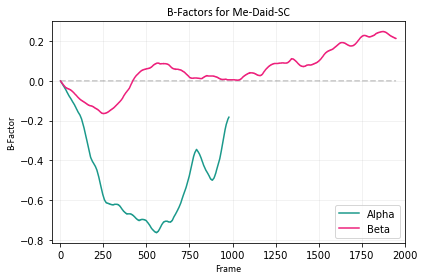

In [242]:
# Plotting A Factors Daid

def f0(x):
    return x*0

plt.grid(alpha = 0.2)

x0 = np.arange(0, 1950, 1)

plt.plot(x0, f0(x0), color = "black", linestyle = "--", alpha = 0.2)
plt.plot(B_Daid_a["FRAME"],B_Daid_a["A-FACTOR"], label = "Alpha", color = "#1B998B")
plt.plot(B_Daid_b["FRAME"],B_Daid_b["A-FACTOR"], label = "Beta", color = "#ED217C")

plt.title("B-Factors for Me-Daid-SC", hfont)

plt.xlabel("Frame", hfont)
plt.xlim(-50, 2000)
plt.ylabel("B-Factor", hfont)
plt.legend(loc="lower right")
plt.tight_layout()

plt.savefig("B-Facs_Daid.svg", format = "svg")

In [3]:
# Loading and plotting of Absorption values

df = pd.read_csv(r"C:\Users\LocalAdmin\Desktop\Bachelorthesis_data\mu_rho_vals.csv")

In [4]:
df

,Column1,Column2,Column3,Column4,Column5
0,NaN,NaN,NaN,NaN,NaN
1,H,0.391,0.388,0.373,1.0
2,He,0.292,0.268,0.202,2.0
3,Li,0.500,0.412,0.198,3.0
4,Be,1.110,0.853,0.256,4.0
...,...,...,...,...,...
94,Pu,280.000,216.000,39.900,94.0
95,Am,322.000,227.000,48.100,95.0
96,Cm,338.000,232.000,49.000,96.0
97,Bk,352.000,226.000,49.000,97.0


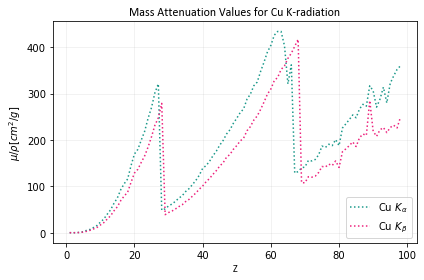

In [17]:
abs_a = df["Column2"]
abs_b = df["Column3"]
Z = df["Column5"]

plt.grid(alpha = 0.2)

plt.plot(Z, abs_a, label=r"Cu $K_{\alpha}$", color = "#1B998B", linestyle="dotted")
plt.plot(Z, abs_b, label=r"Cu $K_{\beta}$", color = "#ED217C", linestyle="dotted")

plt.title("Mass Attenuation Values for Cu K-radiation", hfont)

plt.xlabel("Z", hfont)
plt.ylabel(r"$\mu/\rho [cm^2/g]$", hfont)
plt.legend(loc="lower right")
plt.tight_layout()

plt.savefig("Absorption.svg", format="svg")

In [1]:
# plotting merged stuff

In [7]:
def decidegreaterzero(row):
    if row["test"] == False:
        val = np.nan
    if row["test"] == True:
        val = np.log10(row["Itosig_alpha"])
    return val

def decidegreaterzero2(row):
    if row["test"] == False:
        val = np.nan
    if row["test"] == True:
        val = np.log10(row["Itosig_beta"])
    return val

In [8]:
am = pd.read_csv("data/output_alpha_merged.csv")
am["Inv-dspac_alpha"] = (1/am["Reflins_dspac_alpha"])
am["test"] = ((am["Itosig_alpha"]>0.05))
am["logitosig_a"] = am.apply(decidegreaterzero, axis = 1 )

bm = pd.read_csv("data/output_beta_merged.csv")
bm["Inv-dspac_beta"] = (1/bm["Reflins_dspac_beta"])
bm["test"] = ((bm["Itosig_beta"]>0.05))
bm["logitosig_b"] = bm.apply(decidegreaterzero2, axis = 1 )

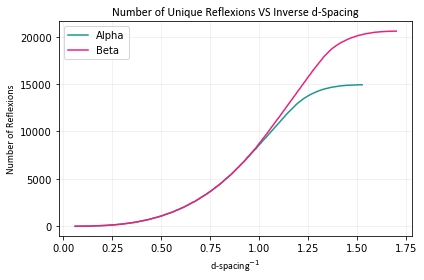

In [18]:
reflins_alpha = am["Reflins_dspac_alpha"]
reflins_beta = bm["Reflins_dspac_beta"]
nr_a = range(0,len(reflins_alpha))
nr_b = range(0,len(reflins_beta))

plt.grid(alpha = 0.2)

plt.plot(reflins_alpha, nr_a, label="Alpha", color = "#1B998B")
plt.plot(reflins_beta, nr_b, label="Beta", color = "#ED217C")

plt.xlabel("d-spacing$^{-1}$", hfont)
plt.ylabel("Number of Reflexions", hfont)
plt.title("Number of Unique Reflexions VS Inverse d-Spacing", hfont)

plt.legend()
plt.tight_layout()
plt.savefig("NrvsDspac_merged.svg", format = "svg")

In [10]:
aI = am["logitosig_a"]
bI = bm["logitosig_b"]

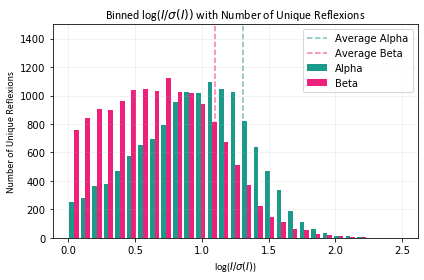

In [17]:
bins = np.linspace(0, 2.5, 30)

colors = ["#1B998B","#ED217C"]
labels = ["Alpha", "Beta"]

plt.grid(alpha = 0.2)

plt.title("Binned log($I/\sigma(I))$ with Number of Unique Reflexions", hfont)
plt.xlabel(r"log($I/\sigma(I)$)", hfont)
plt.ylabel("Number of Unique Reflexions", hfont)
plt.hist([aI,bI], bins, label = labels, color = colors)

avg_alpha = np.log10(20.3)
avg_beta = np.log10(12.6)

plt.axvline(avg_alpha, color="#1B998B", label="Average Alpha", linestyle = "--", alpha = 0.6)
plt.axvline(avg_beta, color="#ED217C", label="Average Beta", linestyle = "--", alpha = 0.6)

plt.ylim(0, 1500)
plt.tight_layout()
plt.legend()
plt.savefig("BinnedItosig_merged.svg", format = "svg")